
 ## Problem 1:  Aminer : basic dataset analysis


#### A. Compute the number of distinct authors, publication venues, publications, and citations/references


In [1]:
authors = set()
venues = set()
publications = set()
citations = set()
index = ""

In [2]:
with open("C:\\Unsupervised\\HW1\AP_train.txt", 'r+', newline='', encoding="utf8") as file:
    for line in file:        
        if line.startswith("#index"):
            index = line[7:]
            publications.add(line)        
        elif line.startswith("#@"):            
            for auth in line[3:].split(";"):
                 authors.add(auth.strip())
        elif line.startswith("#c"):
            venues.add(line)
        elif line.startswith("#%"):                            
            citations.add(index+line)


print("Total number of Distinct Authors :-" , len(authors))
print("Total number of Venues:-" , len(venues))
print("Total number of Publications:-" , len(publications))
print("Total number of Citations/Referenes:-" , len(citations))


Total number of Distinct Authors 1478734
Total number of Venues 255686
Total number of Publications 1976815
Total number of Citations/Referenes 7250326


#### B. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases”13 – what do you notice?


In [3]:
venue_set = set()

with open("C:\\Unsupervised\\HW1\AP_train.txt",'r', newline='', encoding="utf8") as apfile:       
    index = ""
    venue = ""
    for row in apfile:
        if row.startswith("#c"):
            if "Principles and Practice of Knowledge Discovery in Databases" in row:
                venue = row[3:]
                venue_set.add(venue)

print("Venues lists are ")
for venue in venue_set:            
    print(venue)
    

Venues lists are 
Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)

PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases

PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases

Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)

PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases



The Count numbers don't seem accurate. For the same conference, we can see that the venues have different names. While a different publication don't have the same names. This will increase our count of venues than the true count as it is not consistent.


#### C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)


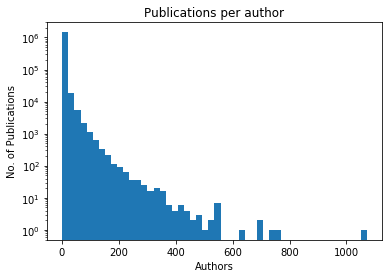

In [12]:
author_publs = {}
# We will consider each Citation as one.
with open("C:\\Unsupervised\\HW1\AP_train.txt","r",newline = "",encoding="utf8") as infile:
        for line in infile:
            if line.startswith("#@"):
                for auth in line[3:].split(";"):
                    if author_publs.get(auth.strip()) == None:
                        author_publs[auth.strip()] = 1
                    else:
                        author_publs[auth.strip()]  += 1
                    
authors = list(author_publs.keys())
publications = list(author_publs.values())

# We will remove values for null author and it's respective publication counts.
index = authors.index("")
del authors[index]
del publications[index]

import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.xlabel('Authors')
plt.ylabel('No. of Publications')
plt.title('Publications per author')
plt.hist(publications,bins=50,log=True)
plt.show()


#### D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

In [13]:
import numpy as np
print("Mean:",np.mean(publications))
print("Standard Deviation:",np.std(publications))
print("1st Quartile:",np.percentile(publications,25))
print("Median:",np.percentile(publications,50))
print("3rd Quartile:",np.percentile(publications,75))

Mean: 3.29178560295
Standard Deviation: 8.87188969104
1st Quartile: 1.0
Median: 1.0
3rd Quartile: 2.0


Majority of authors have one publications as both the first quartile & median values are 1. The distribution is also skewed to the right.

#### E. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?

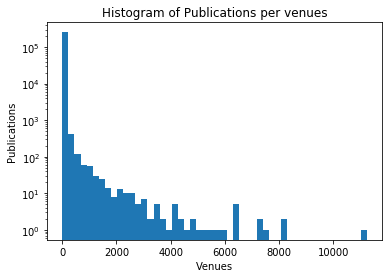

In [14]:
venues_pubs = {}
with open("C:\\Unsupervised\\HW1\AP_train.txt","r",newline = "",encoding="utf8") as infile:
        for line in infile:
            if line.startswith("#c"):
                if venues_pubs.get(line[3:]) == None:
                    venues_pubs[line[3:]] = 1
                else:
                    venues_pubs[line[3:]]  += 1
                    
venues = list(venues_pubs.keys())
v_publications = list(venues_pubs.values())

plt.xlabel('Venues')
plt.ylabel('No. of Publications')
plt.title('Histogram of Publications per venues')
plt.hist(v_publications,bins=50,log = True)
plt.show()

In [20]:
#### Finding the venue with largest number of publications in the dataset
print("Venue with largest no. of publications:",venues[list(venues_pubs.values()).index(max(venues_pubs.values()))])

Venue with largest no. of publications: IEEE Transactions on Information Theory



#### F. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

In [24]:
ref ={}
pubs = {}
cite = {}
cite_venue_count = {}
cite_venue = {}
pubs = {} # publication name

with open("C:\\Unsupervised\\HW1\AP_train.txt","r",newline = "",encoding="utf8") as infile:   
    index = 0
    for line in infile:
        if line.startswith("#index"):
            index = int(line[7:])
        elif line.startswith("#c"):
            venue = line[3:]
            if pubs.get(index) == None:
                pubs[index] = venue
        elif line.startswith("#%"):
            if ref.get(index) == None:
                ref[index] = 1
            else :
                ref[index] += 1
                
            if cite.get(int(line[3:])) == None:
                cite[int(line[3:])] = 1
            else:
                cite[int(line[3:])]  += 1 
            
            cite_venue = pubs.get(int(line[3:]))
            
            if cite_venue_count.get(cite_venue) == None:
                cite_venue_count[cite_venue] = 1
            else:
                cite_venue_count[cite_venue] += 1

print("Publication index, maximum references:" , list(ref.keys())[list(ref.values()).index(max(list(ref.values())))] ,max(list(ref.values())))
print("Publication index,  maximum citations:" , list(cite.keys())[list(cite.values()).index(max(list(cite.values())))] ,max(list(cite.values())))       



Publication index, maximum references: 719353 772
Publication index,  maximum citations: 408396 7753


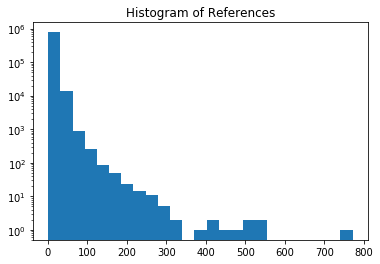

In [25]:
plt.title('Histogram of References')
plt.hist(list(ref.values()),bins=25,log=True)
plt.show()

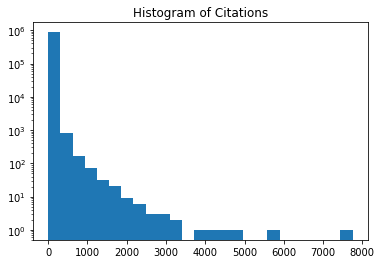

In [26]:
plt.title('Histogram of Citations')
plt.hist(list(cite.values()),bins=25,log=True)
plt.show()

#### G. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results

In [27]:
venue_impact = {}
for ven in cite_venue_count.keys():   
    venue_impact[ven] = 0    
    if venue != 'None' and venues_pubs.get(ven) != None :
        venue_impact[ven] = cite_venue_count[ven]/venues_pubs[ven]

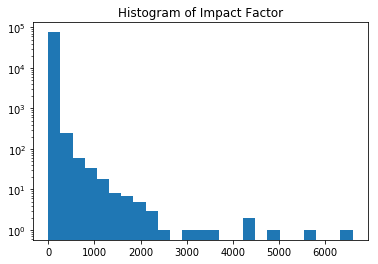

In [28]:
plt.title('Histogram of Impact Factor')
plt.hist(list(venue_impact.values()),bins=25,log= True)
plt.show()

#### H. What is the venue with the highest apparent impact factor? Do you believe this number?(http://mdanderson.libanswers.com/faq/26159)

In [29]:
list(venue_impact.keys())[list(venue_impact.values()).index(max(list(venue_impact.values())))]

'Computers and Intractability: A Guide to the Theory of NP-Completeness\n'

We know that the venue impact factor is related to the no. of citations of all papers. We also know that the name of venues are written differently in different records & we know that these numbers might not be accurate. Thus we should not trust the impact factor.

#### I. Now repeat the calculation from item b., but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?

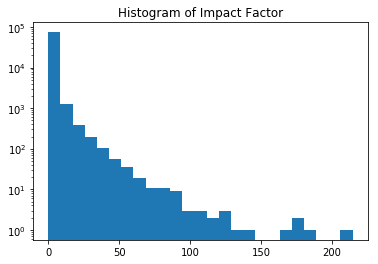

In [30]:
venue_impact = {}
for ven in cite_venue_count.keys():   
    venue_impact[ven] = 0    
    if venue != 'None' and venues_pubs.get(ven) != None and venues_pubs[ven] > 10:
        venue_impact[ven] = cite_venue_count[ven]/venues_pubs[ven]
        
plt.title('Histogram of Impact Factor')
plt.hist(list(venue_impact.values()),bins=25,log= True)
plt.show()

#### J. Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

In [33]:
import collections

year_publication = {}
with open("C:\\Unsupervised\\HW1\AP_train.txt","r",newline = "",encoding="utf8") as infile: 
    year = 0 
    index = 0
    for line in infile:
        if line.startswith("#index"):
            index = int(line[7:])
        elif line.startswith("#t") and len(line) == 8:
            year = int(line[3:])
            if year_publication.get(year) == None:
                year_publication[year] = {"publications":0,"citations":0,"references":0}
                year_publication[year]["publications"] = 1
                if cite.get(index)!= None:
                    year_publication[year]["citations"] = cite.get(index)
                if ref.get(index)!= None:
                    year_publication[year]["references"] = ref.get(index)
            else:
                year_publication[year]["publications"] += 1
                if cite.get(index) != None:
                    year_publication[year]["citations"] += cite.get(index)
                if ref.get(index) != None:
                    year_publication[year]["references"] += ref.get(index)
                    
average_year = {}
for year in year_publication.keys():
    average_year[year] = {}
    average_year[year]["citations"] = year_publication[year]["citations"]/year_publication[year]["publications"]
    average_year[year]["references"] = year_publication[year]["references"]/year_publication[year]["publications"]
    
average_year = collections.OrderedDict(sorted(average_year.items()))



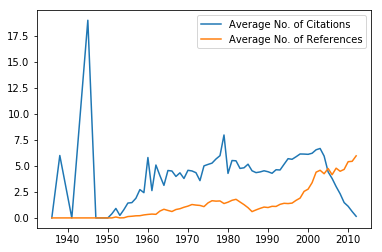

In [35]:
#plotting 
x = list(average_year.keys())
y1 = list([average_year[i]["citations"] for i in x])
y2 = list([average_year[i]["references"] for i in x])

fig, ax = plt.subplots()

plt.plot( x, y1, label = "Average No. of Citations")
plt.plot( x, y2,  label = "Average No. of References")
legend = ax.legend(loc='upper right')
plt.show()

The average number of references per publication has been increasing each year, whereas the average number of citations increasead from 1950 to around 2004 and then has dropped.